<a href="https://colab.research.google.com/github/ajrianop/ML/blob/main/03_K_Means(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Means**

In [1]:
!pip install palmerpenguins

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import seaborn as sns 
import numpy as np
from palmerpenguins import load_penguins

Vamos a descargar la información de diferentes especies de pingüinos con diferentes características.

In [3]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Generamos una copia de penguins para poder trabajar con la información.

In [4]:
penguins1 = penguins.copy()

In [5]:
#penguins
'''
Cantidad de valores nulos por columna
'''
penguins1.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [6]:
penguins1[penguins1['bill_depth_mm'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009


De acuerdo a los datos nulos, observamos que no tienen información relevante para el estudio, por lo cual eliminamos estas filas de nuestra tabla. De igual modo tendremos en cuenta la variables: 
`'bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'`

In [7]:
penguins1 = penguins1[['species','island' ,'bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
penguins1

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0
...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0


In [8]:
penguins1 = penguins1.dropna()
penguins1

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0
...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0


La especies que aparecen en nuestra lista son dadas por

In [9]:
penguins1['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

Veamos la comparación de algunas variables y su clasificación de acuerdo a la variable `'species'`

In [10]:
penguins1['species_number'] = penguins1['species']
penguins1['species_number'].replace(['Adelie', 'Gentoo', 'Chinstrap'], [0, 1, 2], inplace=True)
penguins1

<ipython-input-10-bf3d633fc62d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins1['species_number'] = penguins1['species']
<ipython-input-10-bf3d633fc62d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins1['species_number'].replace(['Adelie', 'Gentoo', 'Chinstrap'], [0, 1, 2], inplace=True)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_number
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,2
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,2
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,2
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,2


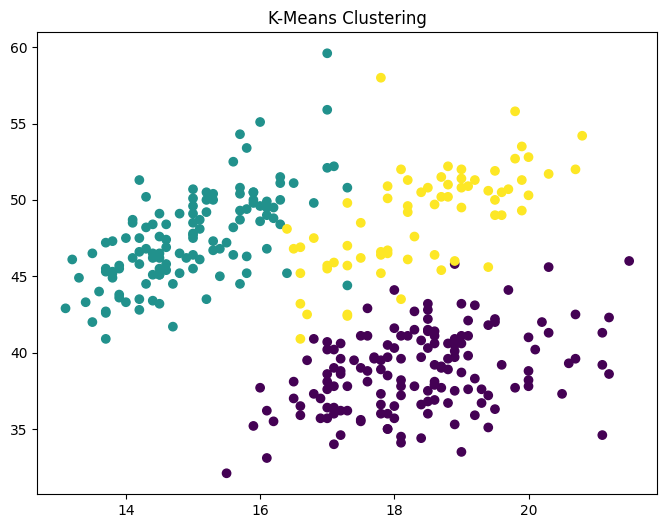

In [11]:
import matplotlib.pyplot as plt
# We plot the information given before:
plt.figure(figsize=(8, 6))
plt.scatter(penguins1['bill_depth_mm'], penguins1['bill_length_mm'], c=penguins1['species_number'])
plt.title('K-Means Clustering')
plt.show()

## **Planteamiento**

Vamos a considerar las variables principales para poder clasificar las diferentes especies de acuerdo a sus caracteristicas, y luego comparar con la clasificación planteada inicialmente.

In [12]:
X = penguins1[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]

Para poder entrenar nuestro modelo es necesario estandarizar la información que se utiliza para el entrenamiento

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(f'longitud de X = {len(X)}')
X

longitud de X = 342


array([[-0.88449874,  0.78544923, -1.41834665, -0.56414208],
       [-0.81112573,  0.1261879 , -1.06225022, -0.50170305],
       [-0.66437972,  0.43046236, -0.42127665, -1.18853234],
       ...,
       [ 1.04154272,  0.53188718, -0.56371522, -0.53292256],
       [ 1.26166175,  0.93758646,  0.64701263, -0.1270689 ],
       [ 1.15160224,  0.78544923, -0.20761879, -0.53292256]])

Utilizando la librería sklearn podemos entrenar nuestro modelo utilizando la técnica de K-Means.

In [14]:
from sklearn.cluster import KMeans
model = KMeans(3)
model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

Veamos las etiquetas que resultaron del proceso utilizando K-Means

In [15]:
#etiquetas
assigments= model.labels_
print('Asignación de cada cluster:', model.labels_)

# los centroides
centroids=model.cluster_centers_
print("Centroides de cada cluster:", model.cluster_centers_)

Asignación de cada cluster: [2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 0 2
 0 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 0
 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 2 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0]
Centroides de cada cluster: [[ 0.66097295  0.8169259  -0.28620559 -0.37431308]
 [ 0.65722922 -1.09998045  1.15886506  1.0917612 ]
 [-1.04805941  0.48655336 -0.89121603 -0.77061658]]


In [16]:
#penguins1['prediction'] = assigments
penguins1.reset_index(inplace=True)

In [17]:
penguins1['prediction'] = pd.DataFrame(assigments)
penguins1

<ipython-input-17-70cb425cb80b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins1['prediction'] = pd.DataFrame(assigments)


,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_number,prediction
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0,2
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0,2
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0,2
3,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0,2
4,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,0,2
...,...,...,...,...,...,...,...,...,...
337,339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,2,0
338,340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,2,0
339,341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,2,0
340,342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,2,0


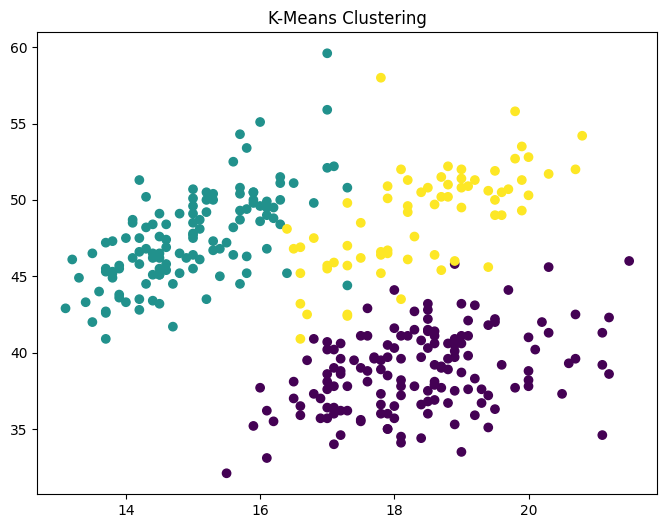

In [18]:
import matplotlib.pyplot as plt
# We plot the information given before:
plt.figure(figsize=(8, 6))
plt.scatter(penguins1['bill_depth_mm'], penguins1['bill_length_mm'], c=penguins1['species_number'])
plt.title('K-Means Clustering')
plt.show()

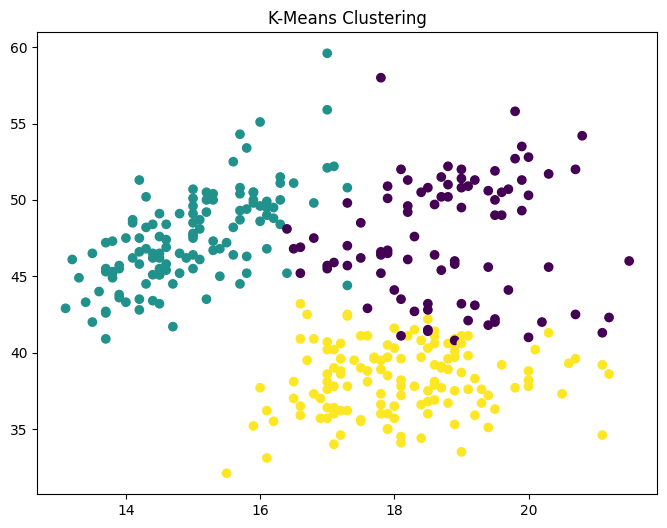

In [19]:
import matplotlib.pyplot as plt
# We plot the information given before:
plt.figure(figsize=(8, 6))
plt.scatter(penguins1['bill_depth_mm'], penguins1['bill_length_mm'], c=penguins1['prediction'])
plt.title('K-Means Clustering')
plt.show()

Para graficar los centroides es necesario utilizar la información estandarizada

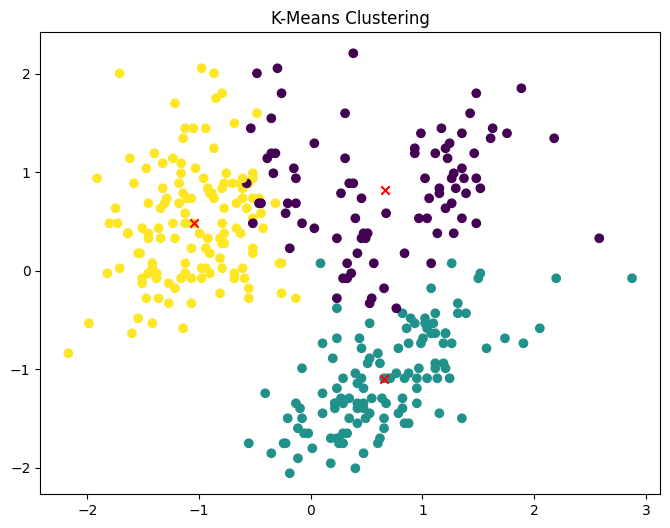

In [20]:
import matplotlib.pyplot as plt
# We plot the information given before:
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=penguins1['prediction'])
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='x', c='red')
plt.title('K-Means Clustering')
plt.show()

In [21]:
values_ok = penguins1[penguins1['species_number'] == penguins1['prediction']]
values_ok 

,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_number,prediction
8,9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,0,0
16,17,Adelie,Torgersen,42.5,20.7,197.0,4500.0,0,0
18,19,Adelie,Torgersen,46.0,21.5,194.0,4200.0,0,0
42,43,Adelie,Dream,44.1,19.7,196.0,4400.0,0,0
48,49,Adelie,Dream,42.3,21.2,191.0,4150.0,0,0
...,...,...,...,...,...,...,...,...,...
294,296,Chinstrap,Dream,42.4,17.3,181.0,3600.0,2,2
296,298,Chinstrap,Dream,43.2,16.6,187.0,2900.0,2,2
304,306,Chinstrap,Dream,40.9,16.6,187.0,3200.0,2,2
306,308,Chinstrap,Dream,42.5,16.7,187.0,3350.0,2,2


In [22]:
print(f'La información que ha sido clasificado de manera correcta es del : {len(values_ok )/len(penguins1)*100} %')

La información que ha sido clasificado de manera correcta es del : 44.44444444444444 %


[2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 0 2
 0 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 0
 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 2 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0]


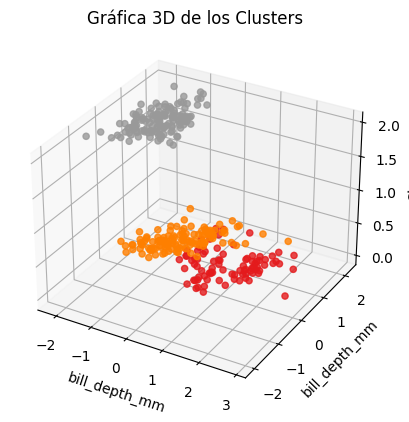

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
print(model.predict(X))
# Plot data points with color-coded labels
ax.scatter(X[:, 0], X[:, 1], model.predict(X), c=model.predict(X), cmap='Set1', alpha=0.8)

# Add labels and title
ax.set_xlabel('bill_depth_mm')
ax.set_ylabel('bill_depth_mm')
ax.set_zlabel('Class')
ax.set_title('Gráfica 3D de los Clusters')

# Show plot
plt.show()

Veamos como se comporta el método con diferentes centroides

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

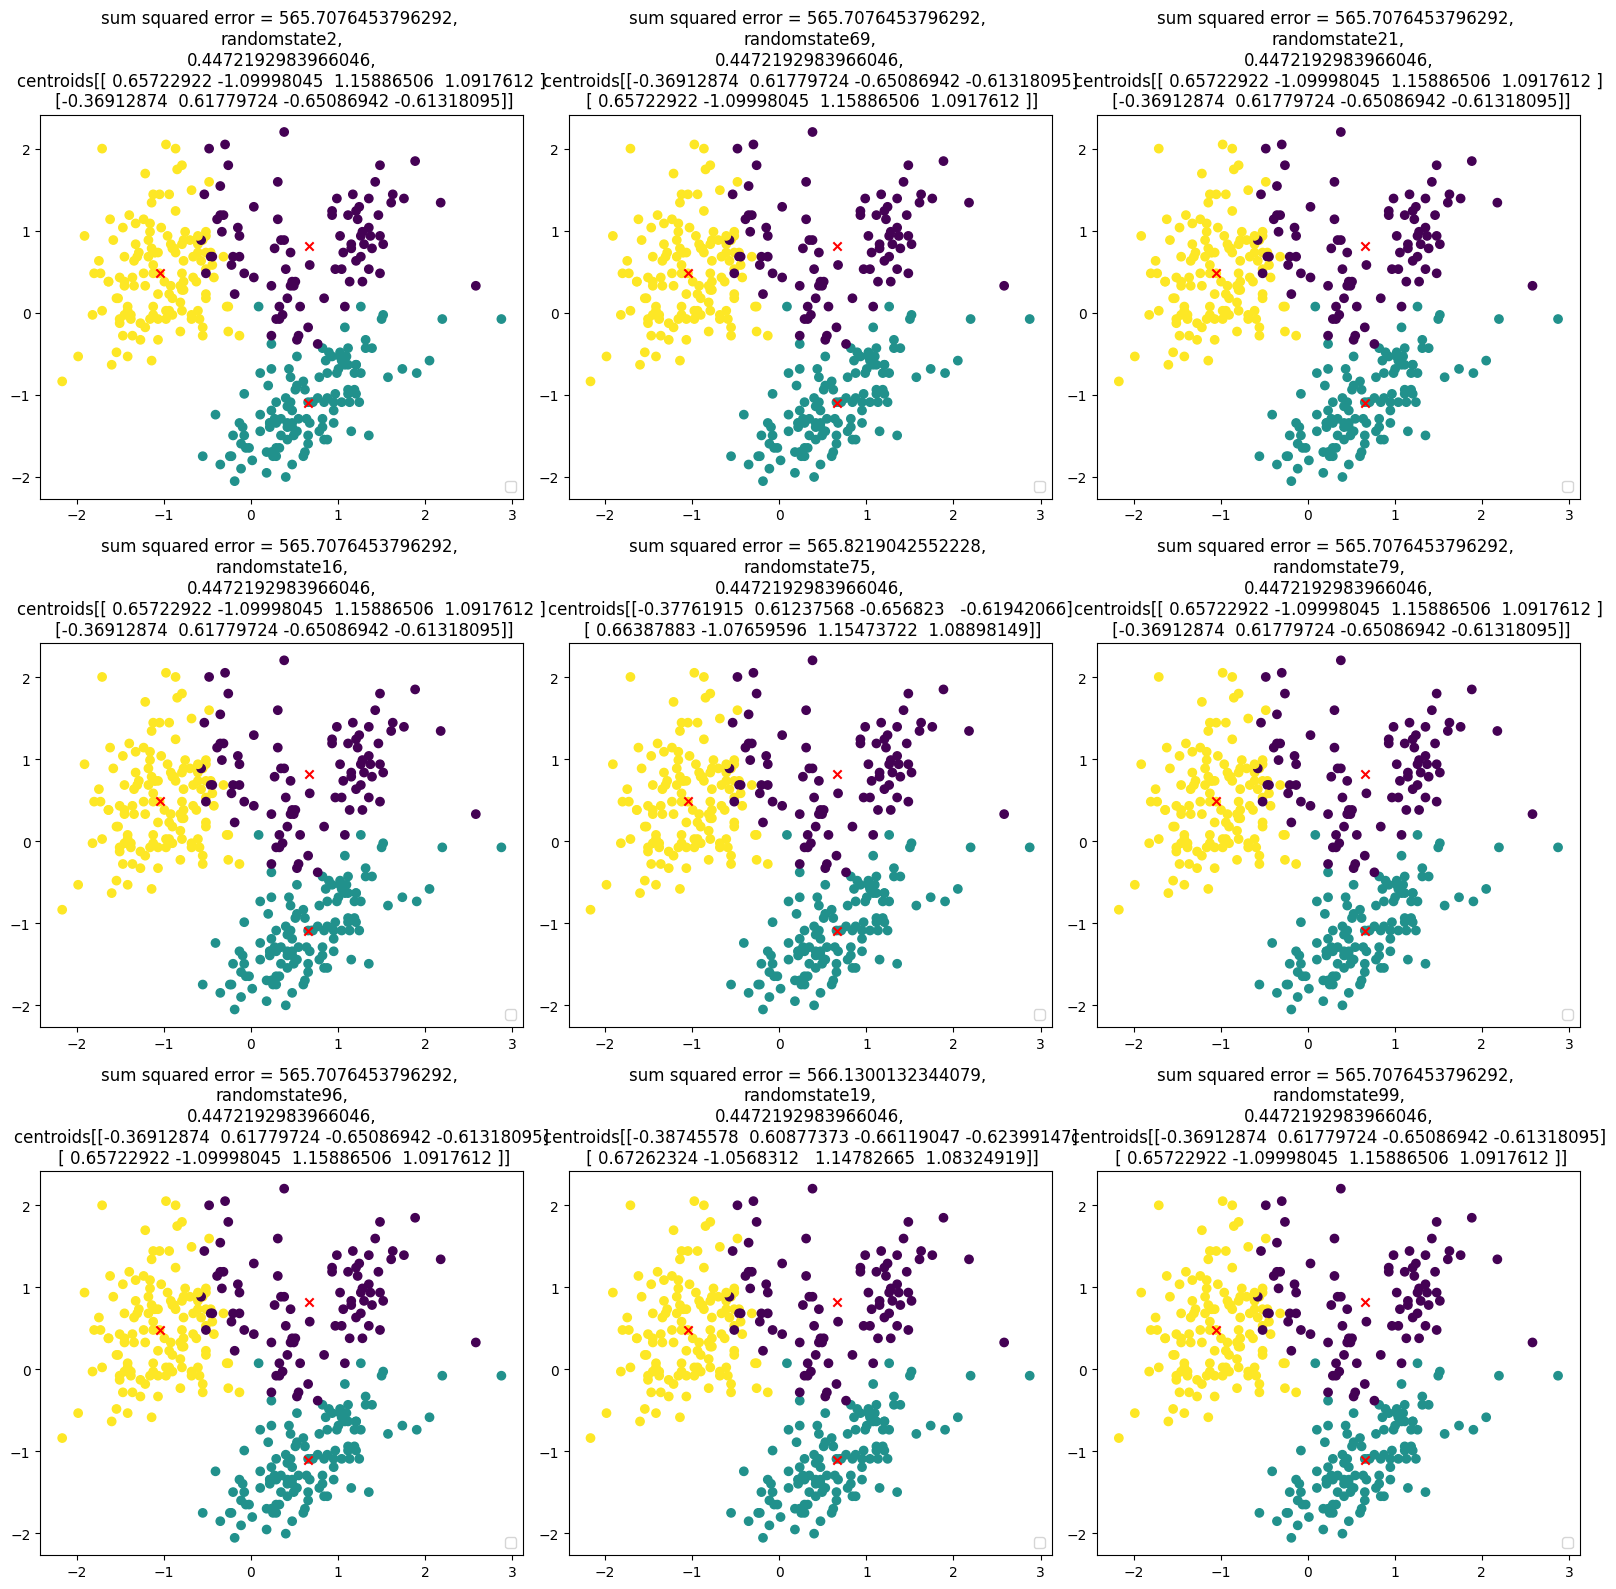

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(16, 16))
ax = np.ravel(ax)
centers = []
# Standardize the data
#X_std = StandardScaler().fit_transform(X)


for i in range(n_iter):
    random_value = np.random.randint(0, 100, size=1)[0]
    km = KMeans(n_clusters=2,
                max_iter=3,
                random_state= random_value)
    km.fit(X)
    assigments= model.labels_
    centroids = km.cluster_centers_
    # Mide que tan separados estan los clusters
    silhouette_avg = silhouette_score(X, assigments)
    centers.append(centroids)
    ax[i].scatter(X[:,0], X[:,1], c=assigments)
    ax[i].scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='x', c='red')
    ax[i].legend(loc='lower right')
    # km.inertia_ Mide las distancias al cuadrado entre cada punto y sus respectivos centroides
    ax[i].set_title(f'sum squared error = {km.inertia_}, \nrandomstate={random_value},\n{silhouette_avg},\ncentroids{centroids}')
plt.tight_layout();

Vamos a tener en cuenta que las anteriores descripciones gráficas plantean solo una de las proyecciones de los puntos descritos, ya que contamos con un espacio de entrenamiento con información de 4 dimensiones (ya que contamos con 4 columnas), para observar como se comporta con las otras características se pueden cambiar las variables.